* 넘파이 다운그레이드 후 텐서플로우와 케라스 설치
아래 명령어는 아나콘다 프롬프트에서 실행할 것
    - conda activate lgchem
    - conda install -c conda-forge numpy=1.18.5
    - pip install --user tensorflow==2.3
    - pip install --user keras==2.4

In [1]:
import numpy
numpy.__version__

'1.18.5'

In [2]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [3]:
import tensorflow.keras as keras
keras.__version__

'2.4.0'

In [4]:
%pwd

'C:\\Users\\shbaek\\workshop'

In [4]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


* 세션: 코드가 어떻게 실행될지 알려주는 소프트웨어 시스템의 환경.
* 텐서플로에서 세션은 CPU나 GPU와 같은 하드웨어 장비가 어떻게 상호작용하는지 설정.
* 사용자는 하드웨어에 상관없이 머신러닝 알고리즘을 디자인할 수 있음.

In [8]:
# 세션의 사용

# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

x = tf.constant([[[1., 2.]]])
neg_Matrix = tf.negative(x)

with tf.Session() as sess:
    result = sess.run(neg_Matrix)
    
print(result, type(result))

[[[-1. -2.]]] <class 'numpy.ndarray'>


In [6]:
type(x)

tensorflow.python.framework.ops.Tensor

In [6]:
type(neg_Matrix)

tensorflow.python.framework.ops.Tensor

In [7]:
neg_Matrix

<tf.Tensor 'Neg:0' shape=(1, 1, 2) dtype=float32>

세션에서 활용할 수 있는 데이터의 종류
* 플레이스홀더(placeholder): 아직 값이 할당되지 않았으나 실행 시에 세션에 의해 초기화되는 값을 의미함. 일반적으로 모델의 입력과 출력에 해당됨.
* 변수: 머신러닝 모델의 파라미터처럼 변할 수 있는 값을 의미. 반드시 변수는 사용 전에 세션에 의해 초기화해야 함.
* 상수: 상수 파라미터나 설정값처럼 변하지 않는 값.

In [9]:
## 점심 ~ 1:30

텐서 연산자
* tf.add() : a + b
* tf.multiply() : a * b
* tf.subtract() : a - b
* tf.divide() : a / b
* tf.pow() : a ** b
* tf.mod() : a % b
* tf.logical_and() : a & b (dtype 은 tf.bool 이어야 함)
* tf.greater() : a > b
* tf.greater_equal() : a >= b
* tf.less_equal() : a <= b
* tf.less() : a < b
* tf.negative() : -a
* tf.logical_not() : ~a (dtype 은 tf.bool 이어야 함)
* tf.abs() : abs(a)
* tf.logical_or() : a | b (dtype 은 tf.bool 이어야 함)

In [10]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a, b)
e = tf.add(c, b)
f = tf.subtract(d, e)

sess = tf.Session()
outs = sess.run(f)
sess.close()

print("outs = {}".format(outs))

outs = 5


In [11]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

a = tf.constant(5)
b = tf.constant(2)
c = tf.constant(3)
d = tf.multiply(a, b)
e = tf.add(c, b)
f = tf.subtract(d, e)

sess = tf.Session()
outs = sess.run(d)
sess.close()

print("outs = {}".format(outs))

outs = 10


In [12]:
a

<tf.Tensor 'Const_5:0' shape=() dtype=int32>

# 텐서플로 1을 이용하여 합성곱 연산 실습

In [14]:
!pip install matplotlib

  Using cached matplotlib-3.5.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Using cached fonttools-4.34.4-py3-none-any.whl (944 kB)
  Using cached Pillow-9.2.0-cp38-cp38-win_amd64.whl (3.3 MB)
  Using cached kiwisolver-1.4.4-cp38-cp38-win_amd64.whl (55 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


(1, 3, 3, 1)


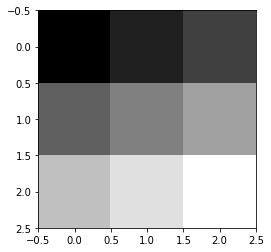

In [15]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
import numpy as np
import matplotlib.pyplot as plt

sess = tf.InteractiveSession()

# image 데이터 준비
image = np.array([[[[1], [2], [3]],
                   [[4], [5], [6]],
                   [[7], [8], [9]]]], dtype=np.float32)
print(image.shape)
plt.imshow(image.reshape(3, 3), cmap='gray')

* Image: 1, 3, 3, 1 image, Filter: 2, 2, 1, 1, Stride: 1x1, Padding: VALID

image.shape  (1, 3, 3, 1)
weight.shape  (2, 2, 1, 1)
conv2d_img.shape  (1, 2, 2, 1)
[[12. 16.]
 [24. 28.]]


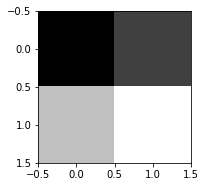

In [17]:
print("image.shape ", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])
print('weight.shape ', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='VALID')
conv2d_img = conv2d.eval()
print('conv2d_img.shape ', conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(2, 2))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(2,2), cmap='gray')
plt.show()

* Image: 1, 3, 3, 1 image, Filter: 2, 2, 1, 1, Stride: 1x1, Padding: SAME

image.shape  (1, 3, 3, 1)
weight.shape  (2, 2, 1, 1)
conv2d_img.shape  (1, 3, 3, 1)
[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]


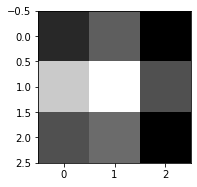

In [18]:
print("image.shape ", image.shape)
weight = tf.constant([[[[1.]], [[1.]]],
                     [[[1.]], [[1.]]]])
print('weight.shape ', weight.shape)

conv2d = tf.nn.conv2d(image, weight, strides=[1, 1, 1, 1], padding='SAME')
conv2d_img = conv2d.eval()
print('conv2d_img.shape ', conv2d_img.shape)

conv2d_img = np.swapaxes(conv2d_img, 0, 3)

for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3, 3))
    plt.subplot(1, 2, i+1), plt.imshow(one_img.reshape(3, 3), cmap='gray')
plt.show()

In [19]:
conv2d_img 

array([[[[12.],
         [16.],
         [ 9.]],

        [[24.],
         [28.],
         [15.]],

        [[15.],
         [17.],
         [ 9.]]]], dtype=float32)

In [25]:
# tf2를 설치 후에 tf1 문법으로 활용
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

pool = tf.nn.max_pool(conv2d_img, ksize=[1, 2, 2, 1], strides=[1, 1, 1, 1], padding='SAME')
print(pool.shape)
print(pool.eval())
sess.close()

(1, 3, 3, 1)
[[[[28.]
   [28.]
   [15.]]

  [[28.]
   [28.]
   [15.]]

  [[17.]
   [17.]
   [ 9.]]]]


# 케라스를 이용한 합성곱 신경망의 구현
## 케라스 mnist 필기체인식

In [21]:
# %load CNNBaseline.py
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf # tf2

# seed 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(seed)

# 데이터 불러오기
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [26]:
print(type(X_train), X_train.shape, type(y_train), y_train.shape)
print(type(X_test), X_test.shape, type(y_test), y_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28) <class 'numpy.ndarray'> (60000,)
<class 'numpy.ndarray'> (10000, 28, 28) <class 'numpy.ndarray'> (10000,)


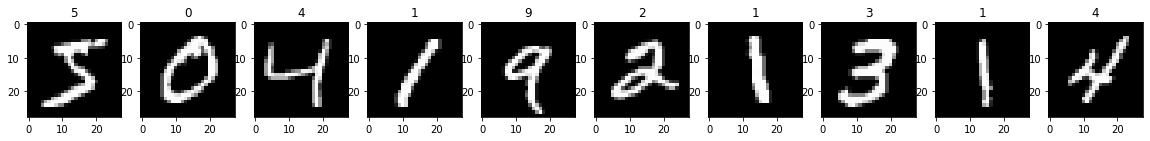

In [27]:
fig, ax = plt.subplots(1, 10, figsize=(20, 4))
for i, img in enumerate(X_train[:10]):
    ax[i].imshow(img, cmap='gray')
    ax[i].set_title(str(y_train[i]))
plt.show()

In [28]:
print(X_train[0].min(), X_train[0].max(), X_train.dtype)

0 255 uint8


In [29]:
y_train[0]

5

In [30]:
to_categorical([1, 3, 5])

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [31]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')/255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [32]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [33]:
print(X_train[0].min(), X_train[0].max(), X_train.dtype, X_train.shape)

0.0 1.0 float32 (60000, 28, 28, 1)


In [34]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [35]:
y_test.shape

(10000, 10)

In [36]:
print(X_test[0].min(), X_test[0].max(), X_test.dtype, X_test.shape)

0.0 1.0 float32 (10000, 28, 28, 1)


In [40]:
Conv2D?

In [44]:
MaxPooling2D?

In [37]:
# CNN을 위한 설정, 신경망 아키텍쳐 준비
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
             optimizer='adam', 
             metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [ ]:
# 아래 셀 실행 시켜두고 휴식: ~ 2:40

before training:  2022-07-19 14:46:30.081729

Epoch 00001: val_loss improved from inf to 0.05876, saving model to ./model\01-0.0588.hdf5

Epoch 00002: val_loss improved from 0.05876 to 0.05524, saving model to ./model\02-0.0552.hdf5

Epoch 00003: val_loss improved from 0.05524 to 0.05283, saving model to ./model\03-0.0528.hdf5

Epoch 00004: val_loss did not improve from 0.05283

Epoch 00005: val_loss improved from 0.05283 to 0.05074, saving model to ./model\05-0.0507.hdf5

Epoch 00006: val_loss improved from 0.05074 to 0.04731, saving model to ./model\06-0.0473.hdf5

Epoch 00007: val_loss improved from 0.04731 to 0.04576, saving model to ./model\07-0.0458.hdf5

Epoch 00008: val_loss improved from 0.04576 to 0.04400, saving model to ./model\08-0.0440.hdf5

Epoch 00009: val_loss improved from 0.04400 to 0.04307, saving model to ./model\09-0.0431.hdf5

Epoch 00010: val_loss improved from 0.04307 to 0.04175, saving model to ./model\10-0.0418.hdf5

Epoch 00011: val_loss improved from 0.0417

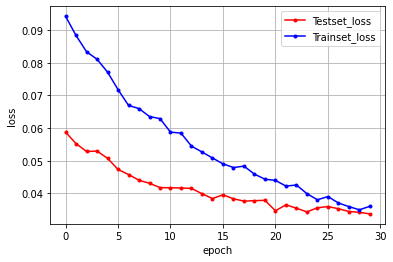

In [39]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, 
                                                  monitor='val_loss', 
                                                  verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

from datetime import datetime
print('before training: ', datetime.now())
# 모델의 실행
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=30, batch_size=2000, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])
print('after training: ', datetime.now())

# 테스트 정확도 출력
print('\n Test Accurary: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 시각화
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [50]:
model.predict(X_test[0:1])

array([[4.0340615e-09, 3.5436674e-08, 6.8020348e-08, 5.8679524e-07,
        7.3767886e-10, 5.1802274e-11, 6.3322340e-14, 9.9999905e-01,
        9.5566399e-10, 1.9947042e-07]], dtype=float32)

In [41]:
predicted_index = np.argmax(model.predict(X_test[0:1]))
target_names = np.array(['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine'])
target_names[predicted_index]

'seven'

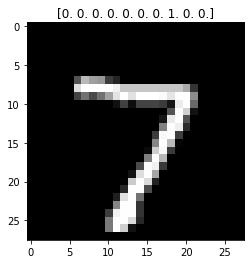

In [42]:
plt.imshow(X_test[0], cmap='gray')
plt.title(str(y_test[0]))
plt.show()

# mnist 패션 데이터에 CNNBaseline.py 코드 적용해보기

In [57]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [59]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# 콘크리트 강도 예측에 적용

In [44]:
!pip install pandas

  Using cached pandas-1.4.3-cp38-cp38-win_amd64.whl (10.6 MB)
  Using cached pytz-2022.1-py2.py3-none-any.whl (503 kB)


In [47]:
!pip install xlrd

  Using cached xlrd-2.0.1-py2.py3-none-any.whl (96 kB)


In [61]:
!pip install scikit-learn

  Using cached scikit_learn-1.1.1-cp38-cp38-win_amd64.whl (7.3 MB)
  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)


In [62]:
list(concrete.columns)

['cement',
 'blast',
 'fly',
 'water',
 'superplasticizer',
 'coarse',
 'fine',
 'age',
 'concrete']

In [66]:
# 데이터 준비

import pandas as pd
concrete = pd.read_excel('datasets/Concrete_Data.xls')
concrete.columns = map(lambda x: x.split(' ')[0].lower(), list(concrete.columns))
print(concrete.columns)
X = concrete.loc[:, :'age']
y = concrete['concrete']
print(X.shape, y.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

Index(['cement', 'blast', 'fly', 'water', 'superplasticizer', 'coarse', 'fine',
       'age', 'concrete'],
      dtype='object')
(1030, 8) (1030,)
(824, 8) (824,) (206, 8) (206,)


In [ ]:
# !pip install --upgrade numpy==1.18.5

In [122]:
# 신경망 아키텍쳐(연산그래프) 디자인
from tensorflow.keras.layers import BatchNormalization

#Building  first layer Layers 
model=Sequential()

model.add(Dense(64,input_dim=8,activation = 'relu')) # 입력 데이터셋

# Bulding Second and third layer
model.add(Dense(32,activation='relu'))
# model.add(BatchNormalization()) # 특성 스케일링과 밀접한 관계 있어보임

# Output Layer
model.add(Dense(1,activation='linear')) # 타겟 레이블

model.summary()


model.compile(loss='mean_squared_error',
             optimizer='adam', 
             metrics=['mean_squared_error'])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 33        
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


before training:  2022-07-19 16:38:45.087904

Epoch 00001: val_loss improved from inf to 1277.70365, saving model to ./concrete_\01-1277.7036.hdf5

Epoch 00002: val_loss did not improve from 1277.70365

Epoch 00003: val_loss improved from 1277.70365 to 1250.65173, saving model to ./concrete_\03-1250.6517.hdf5

Epoch 00004: val_loss improved from 1250.65173 to 921.31124, saving model to ./concrete_\04-921.3112.hdf5

Epoch 00005: val_loss improved from 921.31124 to 363.05125, saving model to ./concrete_\05-363.0512.hdf5

Epoch 00006: val_loss improved from 363.05125 to 297.74938, saving model to ./concrete_\06-297.7494.hdf5

Epoch 00007: val_loss improved from 297.74938 to 294.76877, saving model to ./concrete_\07-294.7688.hdf5

Epoch 00008: val_loss improved from 294.76877 to 196.40128, saving model to ./concrete_\08-196.4013.hdf5

Epoch 00009: val_loss improved from 196.40128 to 166.16114, saving model to ./concrete_\09-166.1611.hdf5

Epoch 00010: val_loss improved from 166.16114 to 14


Epoch 00114: val_loss did not improve from 54.65695

Epoch 00115: val_loss did not improve from 54.65695

Epoch 00116: val_loss did not improve from 54.65695

Epoch 00117: val_loss did not improve from 54.65695

Epoch 00118: val_loss improved from 54.65695 to 53.79920, saving model to ./concrete_\118-53.7992.hdf5

Epoch 00119: val_loss improved from 53.79920 to 53.72252, saving model to ./concrete_\119-53.7225.hdf5

Epoch 00120: val_loss did not improve from 53.72252

Epoch 00121: val_loss did not improve from 53.72252

Epoch 00122: val_loss did not improve from 53.72252

Epoch 00123: val_loss improved from 53.72252 to 53.64645, saving model to ./concrete_\123-53.6465.hdf5

Epoch 00124: val_loss did not improve from 53.64645

Epoch 00125: val_loss did not improve from 53.64645

Epoch 00126: val_loss did not improve from 53.64645

Epoch 00127: val_loss improved from 53.64645 to 52.31335, saving model to ./concrete_\127-52.3133.hdf5

Epoch 00128: val_loss did not improve from 52.31335



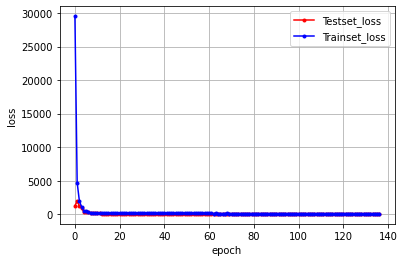

In [123]:
# 모델 학습 및 평가
MODEL_DIR = './concrete_model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)
    
modelpath="./concrete_/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath=modelpath, 
                                                  monitor='val_loss', 
                                                  verbose=1, save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

from datetime import datetime
print('before training: ', datetime.now())
# 모델의 실행
# history = model.fit(X_train, y_train, 
#                     validation_data=(X_test, y_test), 
#                     epochs=10000, batch_size=2000, verbose=0, 
#                     callbacks=[early_stopping_callback, checkpointer])
history = model.fit(X, y, validation_split=0.1,
                    epochs=320, batch_size=100, verbose=0, 
                    callbacks=[early_stopping_callback, checkpointer])
print('after training: ', datetime.now())

# 테스트 정확도 출력
print('\n Test MSE: %.4f' % (model.evaluate(X_test, y_test)[1]))

# 테스트셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 시각화
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c='blue', label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [124]:
model.predict(X_train[0:1])

array([[28.765951]], dtype=float32)

In [125]:
y_train[0]

79.98611076

In [126]:
# Predicting and Finding R Squared Score
y_predict = model.predict(X_test)

from sklearn.metrics import r2_score
print(r2_score(y_test,y_predict))

0.6049446680723141
